## Model_1
<p>Another LinearRegression model</p>

In [1]:
import os
cwd = os.getcwd()
print(cwd)

/home/kenbaker-gif/ML-Projects/Boston/Notebooks


In [2]:
# Loading the dataset
import pandas as pd
data = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/train.csv")
data_2 = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/test.csv")

In [3]:
# Getting familiar with our train dataset 
print(data.head())
print(data.info())

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas   

In [4]:
# Summary statistics for our train data
print(data.describe())
print(data.describe(include="all"))

               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.1333

In [5]:
# Getting to know the data types in the train_data
print(data.dtypes)

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object


In [6]:
import numpy as np
# Dealing with missing values
print(data.isnull().sum())

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


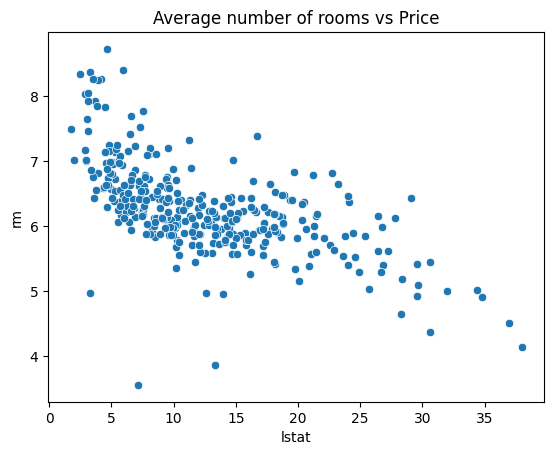

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='lstat', y='rm', data=data)
plt.title('Average number of rooms vs Price')
plt.show()

In [8]:
# Selecting the target(Y) and the features(X)
from sklearn.model_selection import train_test_split
X = data.drop("medv", axis=1)
y = data["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test_scaled)
print(f"MSE:---> {mean_squared_error(y_test, y_pred)}")
print(f"r2Score:---> {r2_score(y_test, y_pred)}")

MSE:---> 23.41170182659842
r2Score:---> 0.7398653051224348


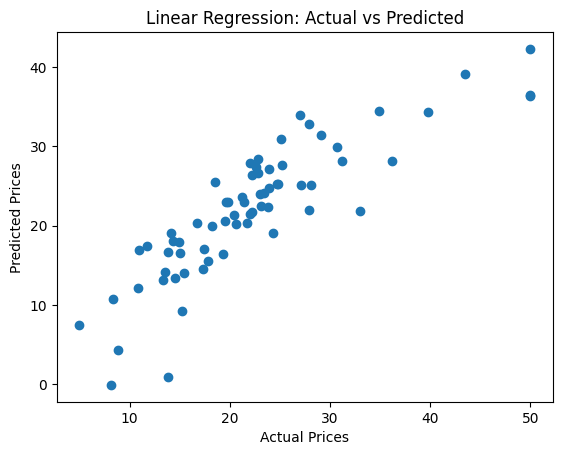

In [12]:
# Visualizing the data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()